In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 

In [2]:
#Fetch Images Count From Folder

In [3]:
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print(dir + ' Floder has' + str(len(files)) + 'Images')
    count = count + len(files)
print('Images Folder has' + str(count) + 'Images')

daisy Floder has764Images
dandelion Floder has1052Images
rose Floder has784Images
sunflower Floder has733Images
tulip Floder has984Images
Images Folder has4317Images


In [4]:
#Load images into Numpy arrays as Dataset

In [5]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size = (img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed = 123,
                                                     validation_split = 0.2,
                                                     subset = 'validation',
                                                     batch_size = batch,
                                                     image_size = (img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [7]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [8]:
import matplotlib.pyplot as plt

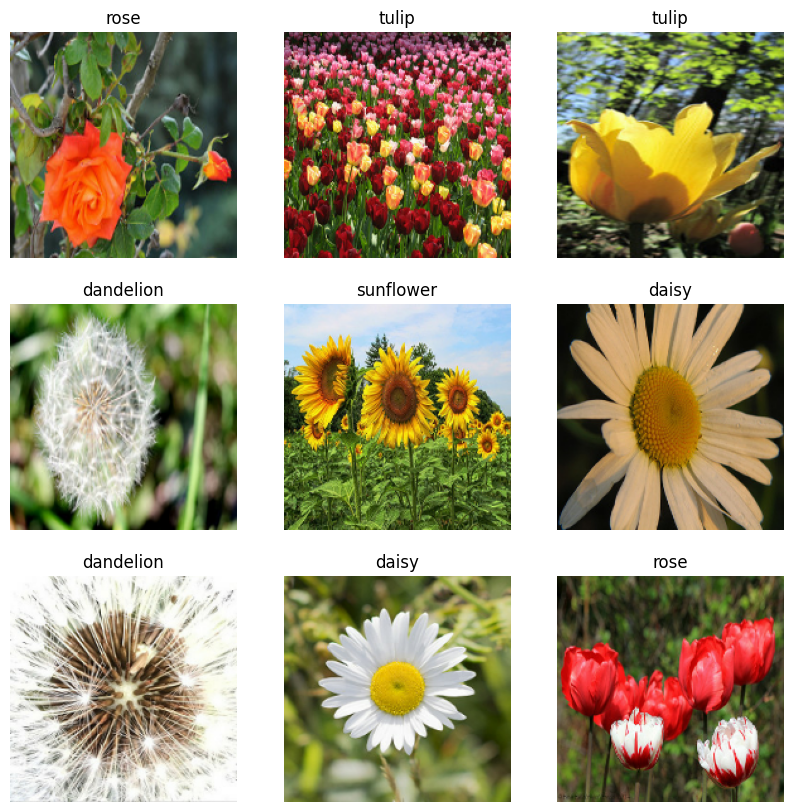

In [9]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [12]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#data augmentation : for smaller dataset , we want to have a number of images and to do that we make no number of images from a single image

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

C:\Users\Ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


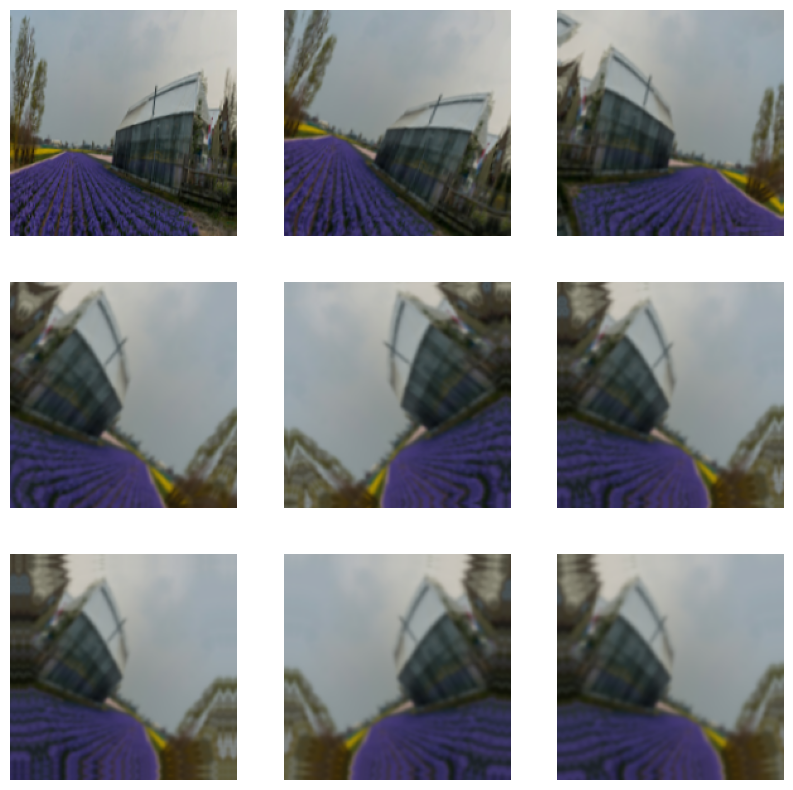

In [15]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3,i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#model creation

In [17]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5),
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

In [20]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 242ms/step - accuracy: 0.3741 - loss: 1.5193 - val_accuracy: 0.5435 - val_loss: 1.1398
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 240ms/step - accuracy: 0.5534 - loss: 1.1104 - val_accuracy: 0.5794 - val_loss: 1.0207
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 28s 256ms/step - accuracy: 0.6283 - loss: 0.9649 - val_accuracy: 0.6107 - val_loss: 1.0057
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 243ms/step - accuracy: 0.6635 - loss: 0.8933 - val_accuracy: 0.6698 - val_loss: 0.8486
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 27s 247ms/step - accuracy: 0.6750 - loss: 0.8444 - val_accuracy: 0.6582 - val_loss: 0.8929
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 238ms/step - accuracy: 0.6841 - loss: 0.8208 - val_accuracy: 0.6547 - val_loss: 0.8823
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 26s 244ms/step - accuracy: 0.7022 - loss: 0.7784 - val_accuracy: 0.7126 - val_loss: 0.7694
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 298ms/step - accuracy: 0.7269 - loss: 0

In [39]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predections = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predections[0])
    outcome = 'The Image Belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome

In [44]:
classify_images('Sample/daisy4.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'The Image Belongs to daisy with a score of 96.43968343734741'